In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from os import listdir
from os.path import isfile, join
onlyfiles = [f[:-5] for f in listdir('StatsBombData/data/three-sixty') if isfile(join('StatsBombData/data/three-sixty', f))]

In [3]:
import pandas as pd
from pandas.io.json import json_normalize
import json
from os import listdir
from os.path import isfile, join
onlyfiles = [f for f in listdir('StatsBombData/data/three-sixty') if isfile(join('StatsBombData/data/three-sixty', f))]
#print(onlyfiles[0])
dfs = list()
dfps = list()
for i,j in enumerate(onlyfiles[0:1]):
    print(j)
    #Load in all match events
    with open('StatsBombData/data/events/'+j) as data_file:
        #print (mypath+'events/'+file)
        data = json.load(data_file)
    with open('StatsBombData/data/three-sixty/' + j) as data_file:
    # print (mypath+'events/'+file)
        data1 = json.load(data_file)
    dfe = json_normalize(data, sep="_").assign(match_id=j[:-5])
    dfp = json_normalize(data1, sep="_").assign(match_id=j[:-5])
    shots = dfe.loc[dfe['type_name'] == 'Shot']
    #print(shots.shape)
    
    #print(dfp['event_uuid'].isin(shots['id']).unique())
    #print(shots['id'])
    #dfp =dfp.loc[dfp['event_uuid'].isin(shots['id'])==True, :]
    dfp=dfp.rename(columns = {'event_uuid':'id'})
    #dfp.set_index('event_uuid')
    #shots= shots.loc[shots['id'].isin(dfp['id'])==True,:]
    #shots.set_index('id')
    #print(dfp.shape)
    #print(shots.shape)
    #print(pd.merge(shots, dfp, on='id').shape)
    data = pd.merge(shots, dfp, on='id')
    #dfpf= dfp.loc[dfp.isin(dfe['id'])]
    #shots = pd.merge(shots,dfp.loc[dfp['event_uuid'].isin(shots['id'])==True, :])
    #print(shots['id'])
    #dfs.append(shots)
    #dfps.append(dfp.loc[dfp['event_uuid'].isin(shots['id'])==True, :])



3788751.json


/tmp/ipykernel_12015/921308347.py:19: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dfe = json_normalize(data, sep="_").assign(match_id=j[:-5])
/tmp/ipykernel_12015/921308347.py:20: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead.
  dfp = json_normalize(data1, sep="_").assign(match_id=j[:-5])


In [4]:
for i in data.loc[0,"freeze_frame"]:
    print(i)
    

{'teammate': False, 'actor': False, 'keeper': False, 'location': [103.40376, 43.714256]}
{'teammate': True, 'actor': False, 'keeper': False, 'location': [107.83189, 44.00914]}
{'teammate': True, 'actor': False, 'keeper': False, 'location': [109.05422, 41.824104]}
{'teammate': False, 'actor': False, 'keeper': False, 'location': [110.13407, 44.66693]}
{'teammate': False, 'actor': False, 'keeper': False, 'location': [110.20367, 42.045948]}
{'teammate': True, 'actor': False, 'keeper': False, 'location': [110.72643, 49.002174]}
{'teammate': False, 'actor': False, 'keeper': False, 'location': [110.87151, 41.413883]}
{'teammate': True, 'actor': False, 'keeper': False, 'location': [111.75743, 40.73054]}
{'teammate': False, 'actor': False, 'keeper': False, 'location': [111.94797, 39.641953]}
{'teammate': True, 'actor': True, 'keeper': False, 'location': [112.890175, 38.28589]}
{'teammate': False, 'actor': False, 'keeper': False, 'location': [113.39757, 38.024677]}
{'teammate': False, 'actor': F

In [5]:
print(data.shape)
for i in data.columns:
    print(i)

(14, 117)
id
index
period
timestamp
minute
second
possession
duration
type_id
type_name
possession_team_id
possession_team_name
play_pattern_id
play_pattern_name
team_id
team_name
tactics_formation
tactics_lineup
related_events
location
player_id
player_name
position_id
position_name
pass_recipient_id
pass_recipient_name
pass_length
pass_angle
pass_height_id
pass_height_name
pass_end_location
pass_type_id
pass_type_name
pass_body_part_id
pass_body_part_name
carry_end_location
pass_outcome_id
pass_outcome_name
ball_receipt_outcome_id
ball_receipt_outcome_name
under_pressure
interception_outcome_id
interception_outcome_name
pass_cross
pass_assisted_shot_id
pass_shot_assist
duel_type_id
duel_type_name
shot_statsbomb_xg
shot_end_location
shot_key_pass_id
shot_type_id
shot_type_name
shot_body_part_id
shot_body_part_name
shot_aerial_won
shot_technique_id
shot_technique_name
shot_outcome_id
shot_outcome_name
shot_freeze_frame
goalkeeper_end_location
goalkeeper_type_id
goalkeeper_type_name
goa

In [6]:
from xGpos import xnum1
pos = np.array([[118.80414, 38.565067]])
#print(tpos)
xnum1(pos,tpos)

NameError: name 'tpos' is not defined

20.12999999999998
119.39148859999992
20.12999999999998
110.73264619999992
20.12999999999998
96.05240069999996
20.12999999999998
136.81925356000002
20.12999999999998
87.92972703999996
20.12999999999998
101.13462139999994
20.12999999999998
70.58365399999992
20.12999999999998
88.18339949999995
20.12999999999998
46.64460075999999
20.12999999999998
42.23659689999995
20.12999999999998
109.38689839999995
20.12999999999998
20.12999999999998
20.12999999999998
20.12999999999998


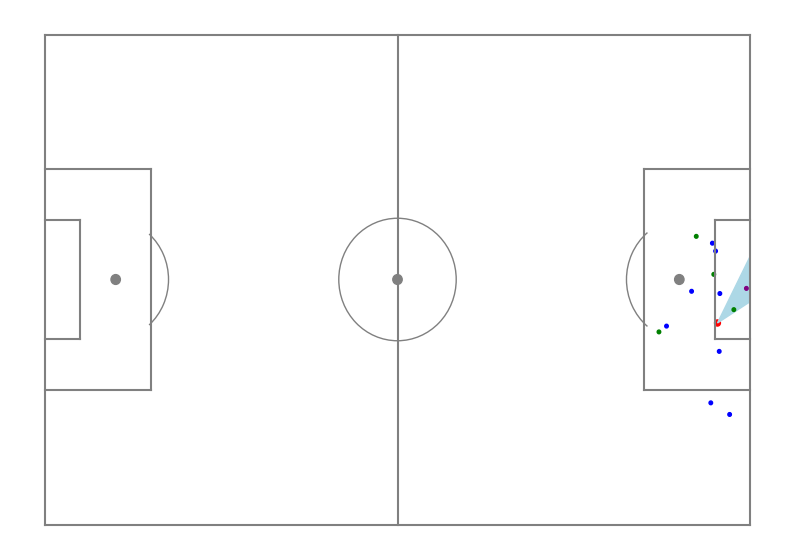

In [12]:
pitchLengthX=120
pitchWidthY=80
circleSize=0.5

from xGpos import xnum1
#Draw the pitch
from FCPython import createPitch
(fig,ax) =createPitch(pitchLengthX,pitchWidthY,'yards','gray')

shot = 3
#plot ball location
x0=data.loc[shot,'location'][0]
y0=data.loc[shot,'location'][1]
    #x1=pas['pass_end_location'][0]
    #y1=pas['pass_end_location'][1]
    #dx = (x1-x0)
    #dy = (y1-y0)
    
passCircle= plt.Circle((x0,y0),circleSize,color="red")
#passArrow = plt.arrow(x0,y0,dx,dy, width = 0.3,color='blue')
ax.add_patch(passCircle)
#dtrangle coordinates
fp=[120,40-(7.32/2)]
bp=[120,40+(7.32/2)]
tpos = np.array([fp,bp,[x0,y0]])
#draw in triangle
t1 = plt.Polygon(tpos, color="lightblue")
ax.add_patch(t1)

#plot players
for i in data.loc[shot,"freeze_frame"]:
    #if i['teammate']:
       # col = 'green'
    #else:
       # col = 'blue'
    x = i['location'][0]
    y = i['location'][1]
    
    if(xnum1(np.array([[x,y]]),tpos) and not(i['teammate'])):
        col = 'purple'
        #print('true')
    elif(not(i['teammate'])):
        col = 'blue'
    else:
        col='green'
    pos = plt.Circle((x,y),0.3,color=col)
    ax.add_patch(pos)

     
fig.set_size_inches(10, 7)
#fig.savefig('Output/shots.pdf', dpi=100) 
plt.show()